# Overview

The diagram below depicts the schematic of the prefix adder. This module consists of two separate parts:

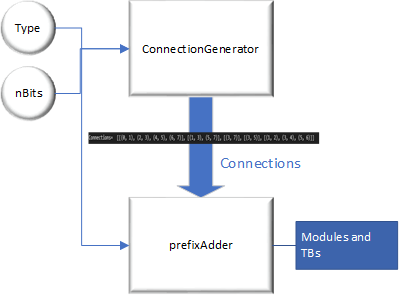

1-	<b>Connection Generator Module:</b> This module creates Connection Matrix for specified prefix adder, resulting in a 2D list that is subsequently passed to the next module named Prefix Adder.

2-	<b>Prefix Adder:</b> Generated Connection Matrix  passes  through the prefix-adder module. This module generates cells and establishes connection between them in each layer and determines cell kind(gray-black) based on their position within graph structure. After construction graph abstraction level of adder, this prefix adder module provides facilities for designer to Verify adder structure through diagram inspection and propagation checking. 

Prefix Adder module can be used to generate corresponding Verilog file and also testbenches.
These test benches can be employed for random testing or exhaustive in-range testing procedures.<br>
Generated modules  are tested using ModelSim and synthesized in ISE Design Suite.<br>


# Utilization Guidelines


<b>The process of generating a prefix adder involves six steps:</b><br>&nbsp;
    (1) - Creation of a raw prefix module with a specified number of bits.<br>&nbsp;
    (2) - Generation of a Connection Matrix using a ConnectionGenerator, specifying the number of bits.<br>&nbsp;
    (3) - Adding generated connections(Step 2) to the raw module.<br>&nbsp;
    (4) - Verification of the graph abstraction of the module through drawing and propagation checking.<br>&nbsp;
    (5) - Generation of the corresponding Verilog file.<br>&nbsp;
    (6) - Creation of testbenches.<br>&nbsp;

<b>The initial version of Connection Generation (1/2024) is capable of generating connection of the following types of adders:</b><br>&nbsp;
    TYPE_RIPPLE = 0<br>&nbsp;
    TYPE_LFA = 1 # Ladner Fischer <br>&nbsp;
    TYPE_KOGGESTONE = 2 # Kogge Stone<br>&nbsp;
    TYPE_HANCARLSON = 3 # Han Carlson<br>&nbsp;
    TYPE_BRENTKUNG  = 4 # Brent Kung<br>&nbsp;


This process illustrated for  for the Brent-Kung Adder in the following code section.

## Brent-Kung Example

First, we need to install OpenCV in order to draw diagrams.

In [ ]:
%pip install opencv-python

### Easy Come but Hard to Go!

Please substitute the variables "N" , "type" and "name" with your preferred values, then proceed to execute the program. 
<br>modules and testbenches will be genearted within "modules" folder.

BrentKung8
Connections=  [[(0, 1), (2, 3), (4, 5), (6, 7)], [(1, 3), (5, 7)], [(3, 7)], [(3, 5)], [(1, 2), (3, 4), (5, 6)]]
True
BrentKung16
Connections=  [[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15)], [(1, 3), (5, 7), (9, 11), (13, 15)], [(3, 7), (11, 15)], [(7, 15)], [(7, 11)], [(3, 5), (7, 9), (11, 13)], [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14)]]
True
BrentKung32
Connections=  [[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (16, 17), (18, 19), (20, 21), (22, 23), (24, 25), (26, 27), (28, 29), (30, 31)], [(1, 3), (5, 7), (9, 11), (13, 15), (17, 19), (21, 23), (25, 27), (29, 31)], [(3, 7), (11, 15), (19, 23), (27, 31)], [(7, 15), (23, 31)], [(15, 31)], [(15, 23)], [(7, 11), (15, 19), (23, 27)], [(3, 5), (7, 9), (11, 13), (15, 17), (19, 21), (23, 25), (27, 29)], [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14), (15, 16), (17, 18), (19, 20), (21, 22), (23, 24), (25, 26), (27, 28), (29, 30)]]
True
BrentKung

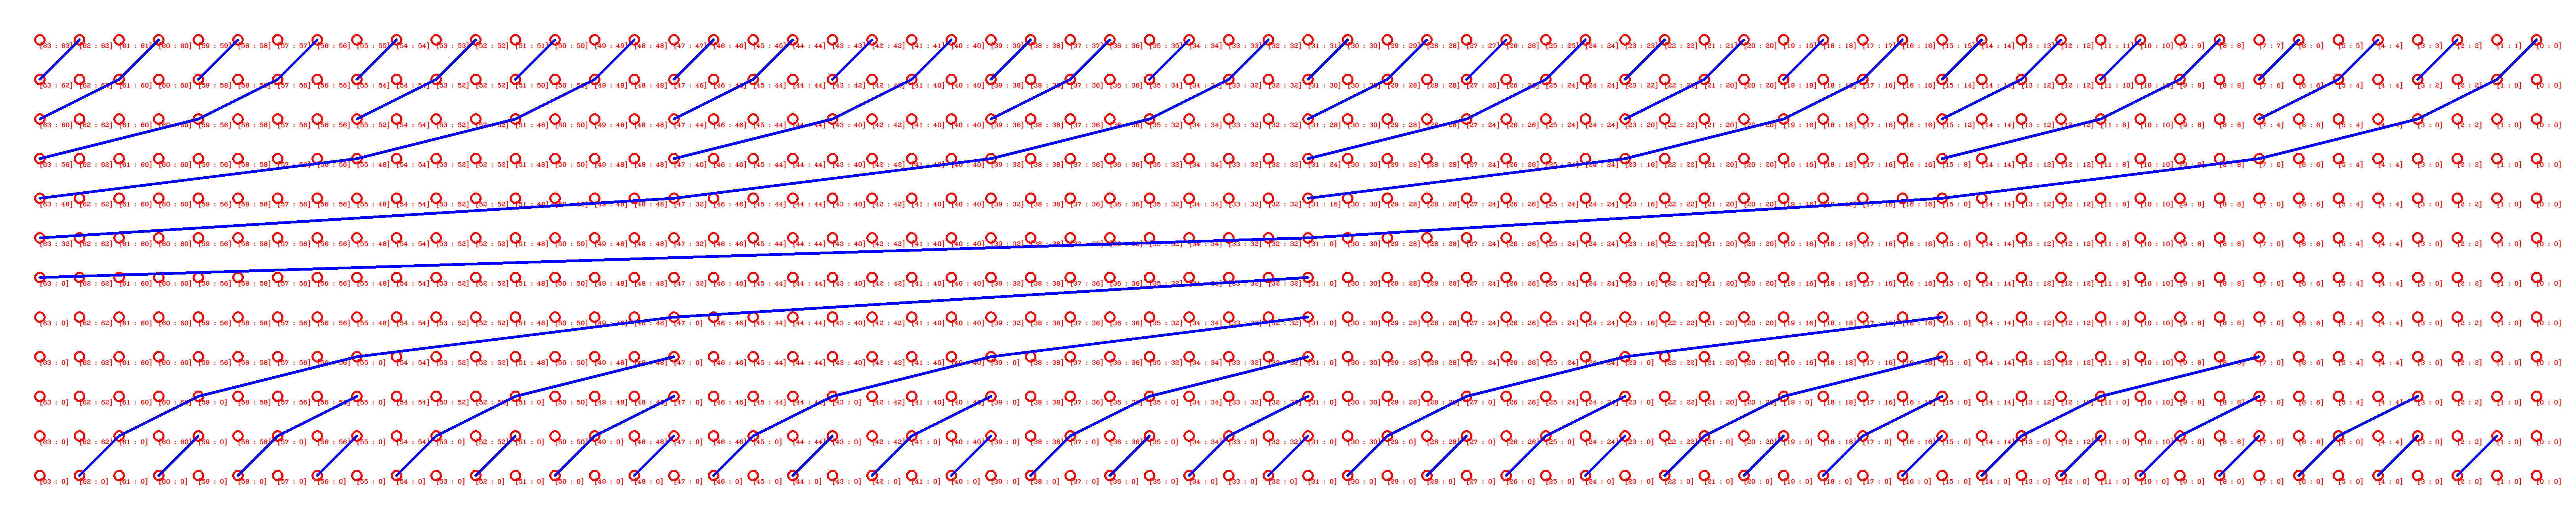

In [6]:
from prefixadder import prefixAdder, ConnectionGenerator
from IPython.display import Image
N = [8, 16, 32, 64]
type = ConnectionGenerator.TYPE_BRENTKUNG
name = "BrentKung"
for n in [8, 16, 32, 64] : 
    # Step 1
    print(name + str(n))
    pa = prefixAdder(n, name)
    # Step 2
    connections = ConnectionGenerator(type, n).GetAsList()
    print("Connections= ", connections)
    # Step 3
    pa.SetConnection(connections)
    # Step 4
    print(pa.checkFinal())
    pa.drawTree(False)
    # Step 5
    pa.GenerateFile("modules/")
    # Step 6
    pa.GenerateTestBench(root = "modules/", ntest = int(1e5))
    pa.GenerateTestBench(True, root = "modules/")
    
Image(filename='test.png')     